In [1]:
import requests
import re
from bs4 import BeautifulSoup
from pprint import pprint
from collections import defaultdict

import networkx as nx
import matplotlib.pyplot as plt

%matplotlib inline

## 1. ‰ªéÂåó‰∫¨Âú∞ÈìÅÂÆòÁΩë‰∏≠‰∏ãËΩΩÂåó‰∫¨Âú∞ÈìÅÊï∞ÊçÆ

In [2]:
def get_page(url, encoding='utf-8'):
    '''
    Ëé∑ÂèñÁΩëÈ°µÁöÑ BeautifulSoup ÂØπË±°
    '''
    try:
        response = requests.get(url)
        if response.status_code == 200:
            response.encoding = encoding
            return BeautifulSoup(response.text, 'html5lib')
    except resquests.ConnectionError as e:
        print('Error! ', e.args)


def parse_page(soup):
    '''
    Ëß£ÊûêÁΩëÈ°µÔºåËøîÂõûÊØèÊù°Âú∞ÈìÅÁ∫øÁöÑÁ´ôÁÇπÔºå‰ª•ÂèäÁ´ôÁÇπÂå∫Èó¥Ë∑ùÁ¶ª
    '''
    line_stations = {}
    range_distance = {}
    subway_map = {}
    table = soup.select('div[class="line_content"] > div[class="line_place"]')
    for line in table:
        head = line.select('thead > tr > td')[0].string
        line_name = re.match('(.*)Áõ∏ÈÇª', head).group(1)
        body = line.select('tbody > tr')

        stations = [
            item.select('th')[0].string.split('‚Äî‚Äî')[0] for item in body
        ]
        stations.append(body[-1].select('th')[0].string.split('‚Äî‚Äî')[1])
        line_stations[line_name] = stations

        distance = {
            tuple(item.select('th')[0].string.split('‚Äî‚Äî')): int(
                item.select('td')[0].string)
            for item in body
        }
        range_distance.update(distance)
        subway_map['line_stations'] = line_stations
        subway_map['range_distance'] = range_distance
    return subway_map

In [3]:
url = 'http://www.bjsubway.com/station/zjgls/#'
soup = get_page(url, encoding='gbk')

In [4]:
subway_map = parse_page(soup)

In [5]:
def show_dict(dict, k_count=3, v_count=5):
    count = 0
    for key, values in dict.items():
        count += 1
        print(key, ':', values)
        if count == k_count: break
    print('...')

In [6]:
show_dict(subway_map['line_stations'])

1Âè∑Á∫ø : ['ËãπÊûúÂõ≠', 'Âè§Âüé', 'ÂÖ´ËßíÊ∏∏‰πêÂõ≠', 'ÂÖ´ÂÆùÂ±±', 'ÁéâÊ≥âË∑Ø', '‰∫îÊ£µÊùæ', '‰∏áÂØøË∑Ø', 'ÂÖ¨‰∏ªÂùü', 'ÂÜõ‰∫ãÂçöÁâ©È¶Ü', 'Êú®Ê®®Âú∞', 'ÂçóÁ§ºÂ£´Ë∑Ø', 'Â§çÂÖ¥Èó®', 'Ë•øÂçï', 'Â§©ÂÆâÈó®Ë•ø', 'Â§©ÂÆâÈó®‰∏ú', 'ÁéãÂ∫ú‰∫ï', '‰∏úÂçï', 'Âª∫ÂõΩÈó®', 'Ê∞∏ÂÆâÈáå', 'ÂõΩË¥∏', 'Â§ßÊúõË∑Ø', 'ÂõõÊÉ†', 'ÂõõÊÉ†‰∏ú']
2Âè∑Á∫ø : ['Ë•øÁõ¥Èó®', 'ËΩ¶ÂÖ¨Â∫Ñ', 'ÈòúÊàêÈó®', 'Â§çÂÖ¥Èó®', 'ÈïøÊ§øË°ó', 'ÂÆ£Ê≠¶Èó®', 'ÂíåÂπ≥Èó®', 'ÂâçÈó®', 'Â¥áÊñáÈó®', 'Âåó‰∫¨Á´ô', 'Âª∫ÂõΩÈó®', 'ÊúùÈò≥Èó®', '‰∏úÂõõÂçÅÊù°', '‰∏úÁõ¥Èó®', 'ÈõçÂíåÂÆ´', 'ÂÆâÂÆöÈó®', 'ÈºìÊ•ºÂ§ßË°ó', 'ÁßØÊ∞¥ÊΩ≠', 'Ë•øÁõ¥Èó®']
4Âè∑Á∫ø : ['ÂÆâÊ≤≥Ê°•Âåó', 'ÂåóÂÆ´Èó®', 'Ë•øËãë', 'ÂúÜÊòéÂõ≠', 'Âåó‰∫¨Â§ßÂ≠¶‰∏úÈó®', '‰∏≠ÂÖ≥Êùë', 'Êµ∑Ê∑ÄÈªÑÂ∫Ñ', '‰∫∫Ê∞ëÂ§ßÂ≠¶', 'È≠èÂÖ¨Êùë', 'ÂõΩÂÆ∂Âõæ‰π¶È¶Ü', 'Âä®Áâ©Âõ≠', 'Ë•øÁõ¥Èó®', 'Êñ∞Ë°óÂè£', 'Âπ≥ÂÆâÈáå', 'Ë•øÂõõ', 'ÁÅµÂ¢ÉËÉ°Âêå', 'Ë•øÂçï', 'ÂÆ£Ê≠¶Èó®', 'ËèúÂ∏ÇÂè£', 'Èô∂ÁÑ∂‰∫≠', 'Âåó‰∫¨ÂçóÁ´ô', 'È©¨ÂÆ∂Â†°', 'ËßíÈó®Ë•ø', 'ÂÖ¨ÁõäË•øÊ°•']
...


In [7]:
show_dict(subway_map['range_distance'], k_count=10)

('ËãπÊûúÂõ≠', 'Âè§Âüé') : 2606
('Âè§Âüé', 'ÂÖ´ËßíÊ∏∏‰πêÂõ≠') : 1921
('ÂÖ´ËßíÊ∏∏‰πêÂõ≠', 'ÂÖ´ÂÆùÂ±±') : 1953
('ÂÖ´ÂÆùÂ±±', 'ÁéâÊ≥âË∑Ø') : 1479
('ÁéâÊ≥âË∑Ø', '‰∫îÊ£µÊùæ') : 1810
('‰∫îÊ£µÊùæ', '‰∏áÂØøË∑Ø') : 1778
('‰∏áÂØøË∑Ø', 'ÂÖ¨‰∏ªÂùü') : 1313
('ÂÖ¨‰∏ªÂùü', 'ÂÜõ‰∫ãÂçöÁâ©È¶Ü') : 1172
('ÂÜõ‰∫ãÂçöÁâ©È¶Ü', 'Êú®Ê®®Âú∞') : 1166
('Êú®Ê®®Âú∞', 'ÂçóÁ§ºÂ£´Ë∑Ø') : 1291
...


## 2. ÂØπÂåó‰∫¨Âú∞ÈìÅÊï∞ÊçÆËøõË°åÂ§ÑÁêÜÔºåÊûÑÂª∫ÈÇªÊé•Ë°®Êó†ÂêëÂõæ

In [8]:
station_connection = defaultdict(list)
for s1, s2 in subway_map['range_distance'].keys():
    station_connection[s1].append(s2)
    station_connection[s2].append(s1)

In [9]:
show_dict(station_connection, k_count=10)

ËãπÊûúÂõ≠ : ['Âè§Âüé']
Âè§Âüé : ['ËãπÊûúÂõ≠', 'ÂÖ´ËßíÊ∏∏‰πêÂõ≠']
ÂÖ´ËßíÊ∏∏‰πêÂõ≠ : ['Âè§Âüé', 'ÂÖ´ÂÆùÂ±±']
ÂÖ´ÂÆùÂ±± : ['ÂÖ´ËßíÊ∏∏‰πêÂõ≠', 'ÁéâÊ≥âË∑Ø']
ÁéâÊ≥âË∑Ø : ['ÂÖ´ÂÆùÂ±±', '‰∫îÊ£µÊùæ']
‰∫îÊ£µÊùæ : ['ÁéâÊ≥âË∑Ø', '‰∏áÂØøË∑Ø']
‰∏áÂØøË∑Ø : ['‰∫îÊ£µÊùæ', 'ÂÖ¨‰∏ªÂùü']
ÂÖ¨‰∏ªÂùü : ['‰∏áÂØøË∑Ø', 'ÂÜõ‰∫ãÂçöÁâ©È¶Ü', 'Ëé≤Ëä±Ê°•', 'Ë•øÈíìÈ±ºÂè∞']
ÂÜõ‰∫ãÂçöÁâ©È¶Ü : ['ÂÖ¨‰∏ªÂùü', 'Êú®Ê®®Âú∞', 'ÁôΩÂ†ÜÂ≠ê', 'Âåó‰∫¨Ë•øÁ´ô']
Êú®Ê®®Âú∞ : ['ÂÜõ‰∫ãÂçöÁâ©È¶Ü', 'ÂçóÁ§ºÂ£´Ë∑Ø']
...


In [10]:
station_connection['ÂÆ£Ê≠¶Èó®']

['ÈïøÊ§øË°ó', 'ÂíåÂπ≥Èó®', 'Ë•øÂçï', 'ËèúÂ∏ÇÂè£']

###  Âåó‰∫¨Â∏ÇÂú∞ÈìÅË∑ØÁ∫øÂõæÂèØËßÜÂåñÔºà‰∏ÄÔºâ

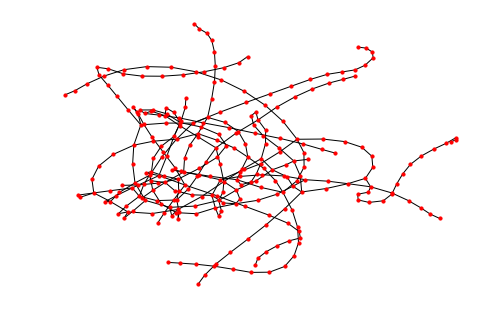

In [11]:
station_connection_graph = nx.Graph(station_connection)
nx.draw(station_connection_graph, with_labels=False, node_size=10)

### Âåó‰∫¨Â∏ÇÂú∞ÈìÅË∑ØÁ∫øÂõæÂèØËßÜÂåñÔºà‰∫åÔºâ

Áî±‰∫éÁº∫Â∞ëÂùêÊ†áÊï∞ÊçÆÔºåÂú∞ÈìÅË∑ØÁ∫øÂõæÊòæÂæóÊúâÁÇπÂáå‰π±„ÄÇ‰ΩøÁî®Áà¨Ëô´‰ªéÁΩëÁªú‰∏äÁà¨ÂèñÂú∞ÈìÅÁ´ôÁöÑÁªèÁ∫¨Â∫¶‰ø°ÊÅØÔºåÂπ∂ÂèØËßÜÂåñ

In [12]:
loc_url = 'https://www.cnblogs.com/tianlin106/p/7007511.html'
loc_soup = get_page(loc_url, encoding='utf-8')
loc_text = loc_soup.select('p[class="p1"] > span[class="s1"]')[0]
loc_text = str(loc_text)
loc_text = re.sub('</span>', '', loc_text)
loc_text.split('|')[:3]

['<span class="s1">ËãπÊûúÂõ≠<span class="s2">,39.9263251384,116.1777806282',
 '<span class="s1">Âè§Âüé<span class="s2">,39.9072014648,116.1902475357',
 '<span class="s1">ÂÖ´ËßíÊ∏∏‰πêÂõ≠<span class="s2">,39.9074319023,116.2128210068']

In [13]:
station_loction = defaultdict(tuple)
stations = []
for line in loc_text.split('|'):
    res = re.match(r'.*"s1"\>(\w+)\<span.*"s2">,(\d+.\d+),\s?(\d+.\d+)', line)
    station = res.group(1)
    longitude = float(res.group(2))
    latitude = float(res.group(3))
    station_loction[station] = (longitude, latitude)
    stations.append(station)

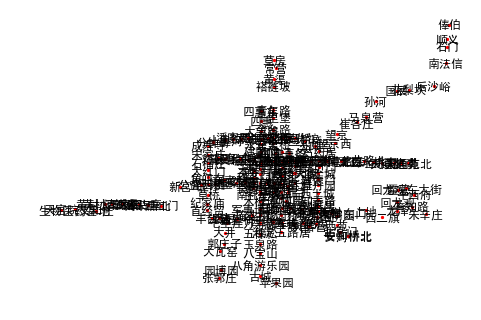

In [14]:
station_graph = nx.Graph()
station_graph.add_nodes_from(stations)
nx.draw(station_graph, station_loction, with_labels=True, node_size=5)

## 3. Âåó‰∫¨Â∏ÇÂú∞ÈìÅË∑ØÁ∫øËßÑÂàí

ÂèÇËÄÉËØæÂ†Ç‰∏äÁöÑ‰ª£Á†ÅÔºåÂÆûÁé∞‰∫ÜÂåó‰∫¨Â∏ÇÂú∞ÈìÅË∑ØÁ∫øËßÑÂàí

In [15]:
def is_goal(desitination):
    def _wrap(current_path):
        return current_path[-1] == desitination

    return _wrap


def search(graph, start, is_goal, search_stragegy, by_way=[]):
    '''
    param: graph: ÈÇªÊé•Ë°®Êó†ÂêëÂõæ
    param: start: Ëµ∑ÂßãÁ´ôÁÇπ
    param: is_goal: Âà§Êñ≠ÊòØÂê¶Âà∞ËææÁªàÁÇπÁ´ô
    param: search_stragery: ÊêúÁ¥¢Á≠ñÁï•ÔºåÁõÆÂâçÂÆûÁé∞Ôºö1.ÊåâË∑ØÁ®ãÊúÄÂ∞ë‰ºòÂÖà 2.ÊåâÊç¢‰πòÊ¨°Êï∞ÊúÄÂ∞ë‰ºòÂÖà 3.ÁªºÂêà‰ºòÂÖàÔºàÂ¶ÇÔºöÊç¢‰πòÊ¨°Êï∞Áõ∏ÂêåÊÉÖÂÜµ‰∏ãË∑ØÁ®ãÊúÄÂ∞ë‰ºòÂÖàÔºâ
    param: by_way: list ÈúÄË¶Å‰∏≠ÈÄîÁªèËøáÁöÑÁ´ôÁÇπ
    '''
    pathes = [[start]]
    seen = set()

    res = []

    while pathes:
        path = pathes.pop(0)
        front_iter = path[-1]

        if front_iter in seen:
            continue
        successor = graph[front_iter]
        for station in successor:
            if station in path:
                continue

            new_path = path + [station]
            pathes.append(new_path)

            if by_way == [] and is_goal(new_path):    # by_way ÊòØÁ©∫Êó∂ÔºåÁõ¥Êé•Âà§Êñ≠ÂΩìÂâçÂú∞ÈìÅÁ´ôÊòØÂê¶ÊòØÁªàÁÇπ
                res.extend(new_path)
                return res
            elif station in by_way:    # Â¶ÇÊûú by_way ‰∏ç‰∏∫Á©∫Ôºå‰∏îÂΩìÂâçÂú∞ÈìÅÁ´ôÊòØË¶ÅÁªèËøáÁöÑÁ´ôÁÇπÔºåÂ∞ÜÂΩìÂâçË∑ØÂæÑÂ≠òÂÖ• res, ‰ª•ÂΩìÂâçÁ´ôÁÇπ‰∏∫Ëµ∑ÁÇπÁªßÁª≠ÊêúÁ¥¢
                res.extend(path)
                by_way.remove(station)
                pathes = []
                seen = set()
                pathes.append([station])

        seen.add(front_iter)
        pathes = search_stragegy(pathes)


def sort_path(cmp_func, subway_map=subway_map):
    '''
    param: cmp_func: ÂÜ≥ÂÆö‰ª•ÊêúÁ¥¢Á≠ñÁï•ÔºåËã•cmp_funcÊòØlistÔºåÂàôÁªºÂêà‰ºòÂÖà
    param: subway_map: Âú∞ÈìÅË∑ØÁ∫øÊï∞ÊçÆÔºåÂåÖÊã¨Á´ôÁÇπÂêçÁß∞ÔºåÂå∫Èó¥Ë∑ùÁ¶ª„ÄÇ ÈªòËÆ§‰∏∫Âåó‰∫¨Â∏ÇÂú∞ÈìÅË∑ØÁ∫øÊï∞ÊçÆ
    '''
    if isinstance(cmp_func, list):

        def _sorted(pathes):
            return sorted(
                pathes, key=lambda path: [func(path) for func in cmp_func])
    else:

        def _sorted(pathes):
            return sorted(pathes, key=cmp_func)

    return _sorted


def get_path_distance(path, subway_map=subway_map):
    '''
    Ëé∑ÂèñË∑ØÂæÑÁöÑË∑ùÁ¶ª
    '''
    distance = 0
    range_distance = subway_map['range_distance']
    for i, c in enumerate(path[:-1]):
        if (c, path[i + 1]) in range_distance.keys():
            distance += range_distance[(c, path[i + 1])]
        else:
            distance += range_distance[(path[i + 1], c)]
    return distance


def get_path_transfer_num(path):
    '''
    Ëé∑ÂèñÊç¢‰πòÊ¨°Êï∞
    '''
    return len(get_path_transfer(path))


def get_path_transfer(path, subway_map=subway_map):
    '''
    Ëé∑ÂèñÊç¢‰πòË∑ØÁ∫ø
    '''
    line_stations = subway_map['line_stations']
    transfer = defaultdict(list)
    for i, c in enumerate(path[:-1]):
        for line, stations in line_stations.items():
            if (c in stations) and (path[i + 1] in stations):    # Ê†πÊçÆË∑ØÂæÑ‰∏≠ÁöÑËøûÁª≠Á´ôÁÇπÂà§Êñ≠Âú∞ÈìÅÁ∫øË∑Ø                
                transfer[line].append(c)
                transfer[line].append(path[i + 1])
    return transfer

### ÁªìÊûúÂ±ïÁ§∫

In [16]:
def show_path(path):
    res = ""
    transfer = get_path_transfer(path)
    for line, stations in transfer.items():
        start = stations[0]
        end = stations[-1]
        s = "üöá{}‰∏äËΩ¶‚Äî‚Äî{}‚Äî‚Äîüöá{}‰∏ãËΩ¶\n".format(start, line, end)
        res += s
    return res

def show_distence(path):
    dis = get_path_distance(path)
    return 'ÊÄªË∑ØÁ®ã{:.1f}ÂÖ¨Èáå'.format(dis/1000)

#### ÊúÄÁü≠Ë∑ØÁ®ã‰ºòÂÖà

In [17]:
res1 = search(
    graph=station_connection,
    start='ËãèÂ∫Ñ',
    is_goal=is_goal('Âåó‰∫¨Á´ô'),
    search_stragegy=sort_path(get_path_distance))
print(show_path(res1))
print(show_distence(res1))

üöáËãèÂ∫Ñ‰∏äËΩ¶‚Äî‚ÄîÊàøÂ±±Á∫ø‚Äî‚ÄîüöáÈÉ≠ÂÖ¨Â∫Ñ‰∏ãËΩ¶
üöáÈÉ≠ÂÖ¨Â∫Ñ‰∏äËΩ¶‚Äî‚Äî9Âè∑Á∫ø‚Äî‚ÄîüöáÂåó‰∫¨Ë•øÁ´ô‰∏ãËΩ¶
üöáÂåó‰∫¨Ë•øÁ´ô‰∏äËΩ¶‚Äî‚Äî7Âè∑Á∫ø‚Äî‚ÄîüöáËèúÂ∏ÇÂè£‰∏ãËΩ¶
üöáËèúÂ∏ÇÂè£‰∏äËΩ¶‚Äî‚Äî4Âè∑Á∫ø‚Äî‚ÄîüöáÂÆ£Ê≠¶Èó®‰∏ãËΩ¶
üöáÂÆ£Ê≠¶Èó®‰∏äËΩ¶‚Äî‚Äî2Âè∑Á∫ø‚Äî‚ÄîüöáÂåó‰∫¨Á´ô‰∏ãËΩ¶

ÊÄªË∑ØÁ®ã44.2ÂÖ¨Èáå


In [18]:
res1 = search(
    graph=station_connection,
    start='Âåó‰∫¨Ë•øÁ´ô',
    is_goal=is_goal('ÂçóÈî£ÈºìÂ∑∑'),
    search_stragegy=sort_path(get_path_distance))
print(show_path(res1))
print(show_distence(res1))

üöáÂåó‰∫¨Ë•øÁ´ô‰∏äËΩ¶‚Äî‚Äî9Âè∑Á∫ø‚Äî‚ÄîüöáÁôΩÁü≥Ê°•Âçó‰∏ãËΩ¶
üöáÁôΩÁü≥Ê°•Âçó‰∏äËΩ¶‚Äî‚Äî6Âè∑Á∫ø‚Äî‚ÄîüöáÂçóÈî£ÈºìÂ∑∑‰∏ãËΩ¶

ÊÄªË∑ØÁ®ã10.9ÂÖ¨Èáå


#### ‰∏éÁôæÂ∫¶Âú∞ÂõæÁöÑÊó∂Èó¥ÊúÄÁü≠‰ºòÂÖàÁªìÊûúÂØπÊØî
- ËãèÂ∫Ñ Ëá≥ Âåó‰∫¨Á´ô Ë∑ØÁ∫ø**ÊúâÊâÄÂ∑ÆÂºÇ**Ôºå‰ΩÜÊòØÊàë‰ª¨ÁöÑË∑ØÁ®ãËæÉÁü≠


- Âåó‰∫¨Ë•øÁ´ô Ëá≥ ÂçóÈî£ÈºìÂ∑∑ **ÁªìÊûúÁõ∏Âêå**

**ÂéüÂõ†**Ôºö Áî±‰∫éÊàë‰ª¨ÁöÑÁ®ãÂ∫èÊ≤°ÊúâËÄÉËôëÁî®Êà∑Êç¢‰πòÊó∂ÁöÑÊ≠•Ë°åÊó∂Èó¥ÔºåÂú®ÈúÄË¶ÅÁªèËøáËæÉÂ§öÊç¢‰πòÊó∂ÔºåËØØÂ∑ÆÂ∞±‰ºöÁ¥ØÁßØÂèòÂ§ß

<img style="float:left;" src="./image/1.PNG" width="25%">  
<img style="float:center;" src="./image/2.PNG" width="25%">

#### Êç¢‰πòÊ¨°Êï∞ÊúÄÂ∞ë‰ºòÂÖà

In [19]:
res2 = search(
    graph=station_connection,
    start='ËãèÂ∫Ñ',
    is_goal=is_goal('Áü≥Èó®'),
    search_stragegy=sort_path(get_path_transfer_num))
print(show_path(res2))
print(show_distence(res2))

üöáËãèÂ∫Ñ‰∏äËΩ¶‚Äî‚ÄîÊàøÂ±±Á∫ø‚Äî‚ÄîüöáÈÉ≠ÂÖ¨Â∫Ñ‰∏ãËΩ¶
üöáÈÉ≠ÂÖ¨Â∫Ñ‰∏äËΩ¶‚Äî‚Äî9Âè∑Á∫ø‚Äî‚ÄîüöáÁôΩÁü≥Ê°•Âçó‰∏ãËΩ¶
üöáÁôΩÁü≥Ê°•Âçó‰∏äËΩ¶‚Äî‚Äî6Âè∑Á∫ø‚Äî‚ÄîüöáÈáëÂè∞Ë∑Ø‰∏ãËΩ¶
üöáÈáëÂè∞Ë∑Ø‰∏äËΩ¶‚Äî‚Äî14Âè∑Á∫ø(Ë•øÊÆµ)‚Äî‚ÄîüöáÊúõ‰∫¨‰∏ãËΩ¶
üöáÊúõ‰∫¨‰∏äËΩ¶‚Äî‚Äî15Âè∑Á∫ø‚Äî‚ÄîüöáÁü≥Èó®‰∏ãËΩ¶

ÊÄªË∑ØÁ®ã86.5ÂÖ¨Èáå


#### ‰∏éÁôæÂ∫¶Âú∞ÂõæÁöÑÊó∂Èó¥Â∞ëÊç¢‰πò‰ºòÂÖàÁªìÊûúÂØπÊØî
- ËãèÂ∫Ñ Ëá≥ Áü≥Èó® Ë∑ØÁ∫ø‰∏éÂíåÁ¨¨‰∫åÊù°Êé®ËçêË∑ØÁ∫øÁõ∏Âêå

<img style="float:left;" src="./image/3.PNG" width="25%">  

#### ÁªºÂêà‰ºòÂÖà

In [20]:
res3 = search(
    graph=station_connection,
    start='‰º†Â™íÂ§ßÂ≠¶',
    is_goal=is_goal('ÂÆâÊ≤≥Ê°•Âåó'),
    search_stragegy=sort_path([get_path_transfer_num, get_path_distance]))
print(show_path(res3))
print(show_distence(res3))

üöá‰º†Â™íÂ§ßÂ≠¶‰∏äËΩ¶‚Äî‚ÄîÂÖ´ÈÄöÁ∫ø‚Äî‚ÄîüöáÂõõÊÉ†‰∏ãËΩ¶
üöáÂõõÊÉ†‰∏ú‰∏äËΩ¶‚Äî‚Äî1Âè∑Á∫ø‚Äî‚ÄîüöáË•øÂçï‰∏ãËΩ¶
üöáË•øÂçï‰∏äËΩ¶‚Äî‚Äî4Âè∑Á∫ø‚Äî‚ÄîüöáÂÆâÊ≤≥Ê°•Âåó‰∏ãËΩ¶

ÊÄªË∑ØÁ®ã34.5ÂÖ¨Èáå


#### ‰∏éÁôæÂ∫¶Âú∞ÂõæÁöÑÁªìÊûúÂØπÊØî
- Ë∑ØÁ∫ø‰∏ÄËá¥

<img style="float:left;" src="./image/4.PNG" width="25%">  